<a href="https://colab.research.google.com/github/prncrlnd/Test/blob/main/Different_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf

def relu(x):
  return tf.nn.relu(x)

def swish(x):
  return x * tf.sigmoid(x)

def mish(x):
  return x * tf.tanh(tf.log(1 + tf.exp(x)))


Activation functions defined successfully!


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8768 - loss: 0.4336 - val_accuracy: 0.9605 - val_loss: 0.1315
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9644 - loss: 0.1190 - val_accuracy: 0.9662 - val_loss: 0.1090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0774 - val_accuracy: 0.9732 - val_loss: 0.0835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0559 - val_accuracy: 0.9731 - val_loss: 0.0825
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9875 - loss: 0.0439 - val_accuracy: 0.9740 - val_loss: 0.0810
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9896 - loss: 0.0350 - val_accuracy: 0.9758 - val_loss: 0.0803
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0265 - val_accuracy: 0.9768 - val_loss: 0.0746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9945 - loss: 0.0201 

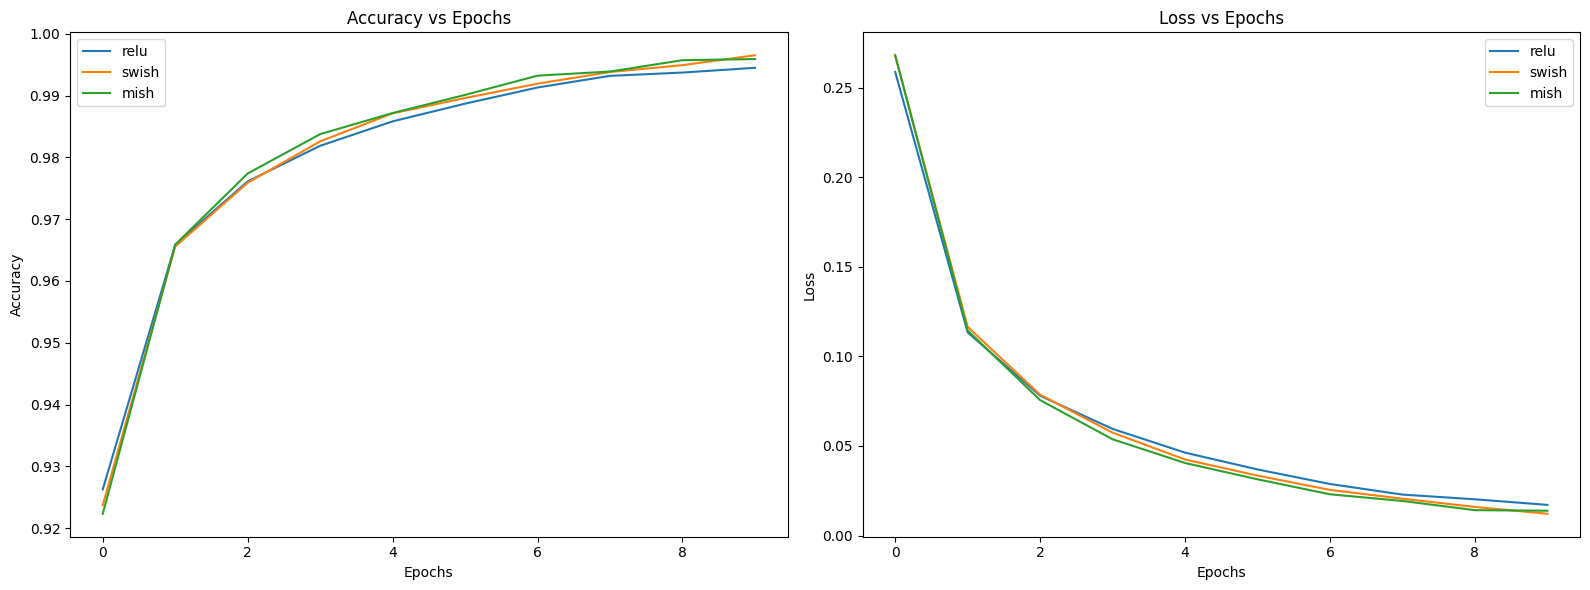

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# ... (rest of the code from the previous task)

# Create models with different activation functions
models = {
    'relu': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    'swish': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='swish'),
        Dense(10, activation='softmax')
    ]),
    'mish': Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='mish'),
        Dense(10, activation='softmax')
    ])
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    results[name] = history

# Plot training curves
plt.figure(figsize=(16, 6))  # Increase figure size to accommodate two plots

# Accuracy vs Epochs
plt.subplot(1, 2, 1)  # Create first subplot for accuracy
for name, history in results.items():
    plt.plot(history.history['accuracy'], label=name)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss vs Epochs
plt.subplot(1, 2, 2)  # Create second subplot for loss
for name, history in results.items():
    plt.plot(history.history['loss'], label=name)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()